# Meteorite Landings Data
This comprehensive data set from The Meteoritical Society contains information on all of the known meteorite landings.

First, we need to download the data. We are going to use the requests package.

In [20]:
import datetime

import numpy as np

url = 'https://data.nasa.gov/api/views/gh4g-9sfh/rows.csv?accessType=DOWNLOAD'

In [19]:
import requests

In [21]:
response = requests.get(url)

In [22]:
response.status_code

200

Now, we are going to save the data to a file.

In [23]:
with open('meteorite_landings_data.csv', 'wb') as file:
    file.write(response.content)

Next step is to use pandas to read in the data so that they are ready for analysis and manipulation.

In [25]:
import pandas as pd

In [26]:
data = pd.read_csv('meteorite_landings_data.csv')

After the data is loaded into pandas, we can check some basic information about it, like number of rows and colums using the shape field.

In [27]:
type(data)

pandas.core.frame.DataFrame

In [28]:
len(data)

45716

In [29]:
data.shape

(45716, 10)

Using the **head()** method gives us the first few rows of the dataset (5 by default). 

In [30]:
data.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"


The **tail()** method gives us the last few rows. Below we are asking for the last 10 rows.

In [31]:
data.tail(10)

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
45706,Zerkaly,31354,Valid,H5,16000.0,Found,1956.0,52.13333,81.96667,"(52.13333, 81.96667)"
45707,Zhaoping,54609,Valid,"Iron, IAB complex",2000000.0,Found,1983.0,24.23333,111.18333,"(24.23333, 111.18333)"
45708,Zhigansk,30405,Valid,"Iron, IIIAB",900000.0,Found,1966.0,68.00000,128.30000,"(68.0, 128.3)"
45709,Zhongxiang,30406,Valid,Iron,100000.0,Found,1981.0,31.20000,112.50000,"(31.2, 112.5)"
45710,Zillah 001,31355,Valid,L6,1475.0,Found,1990.0,29.03700,17.01850,"(29.037, 17.0185)"
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037, 17.0185)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.78333, 8.96667)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.25, 17.66667)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.78917, 41.5046)"
45715,Zulu Queen,30414,Valid,L3.7,200.0,Found,1976.0,33.98333,-115.68333,"(33.98333, -115.68333)"


We can obtain some useful statistics about our data by using the **info()** method.

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3   recclass     45716 non-null  object 
 4   mass (g)     45585 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45425 non-null  float64
 7   reclat       38401 non-null  float64
 8   reclong      38401 non-null  float64
 9   GeoLocation  38401 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.5+ MB


Using **describe()** on our dataset, gives us some statistical data. Only the numerical columns are included in the summary.

In [33]:
data.describe()

,id,mass (g),year,reclat,reclong
count,45716.000000,4.558500e+04,45425.000000,38401.000000,38401.000000
mean,26889.735104,1.327808e+04,1991.828817,-39.122580,61.074319
std,16860.683030,5.749889e+05,25.052766,46.378511,80.647298
min,1.000000,0.000000e+00,860.000000,-87.366670,-165.433330
25%,12688.750000,7.200000e+00,1987.000000,-76.714240,0.000000
50%,24261.500000,3.260000e+01,1998.000000,-71.500000,35.666670
75%,40656.750000,2.026000e+02,2003.000000,0.000000,157.166670
max,57458.000000,6.000000e+07,2101.000000,81.166670,354.473330


We can easily explore our data by selecting a specific column (Series) and calling various methods on them. **value_counts()**, for instance, calculates the frequency of unique elements.

In [34]:
data['nametype'].value_counts()

nametype
Valid     45641
Relict       75
Name: count, dtype: int64

Dot notation can also be used to access series of a data frame.

In [35]:
data.recclass.value_counts()

recclass
L6         8285
H5         7142
L5         4796
H6         4528
H4         4211
           ... 
EL7           1
CH/CBb        1
H/L~4         1
LL3.7-6       1
L/LL          1
Name: count, Length: 466, dtype: int64

Let's now create a simple query. Our output here is a Series consisting of indexes and boolean values. The rows of our data frame that match the specified criteria have been assigned a True value.

In [36]:
data['recclass'] == 'L6'

0        False
1        False
2        False
3        False
4         True
         ...  
45711    False
45712    False
45713    False
45714     True
45715    False
Name: recclass, Length: 45716, dtype: bool

We can use the above to filter our data.

In [37]:
data.loc[data['recclass'] == 'L6']

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"
8,Aguada,398,Valid,L6,1620.0,Fell,1930.0,-31.60000,-65.23333,"(-31.6, -65.23333)"
11,Aïr,424,Valid,L6,24000.0,Fell,1925.0,19.08333,8.38333,"(19.08333, 8.38333)"
13,Akaba,426,Valid,L6,779.0,Fell,1949.0,29.51667,35.05000,"(29.51667, 35.05)"
24,Aleppo,462,Valid,L6,3200.0,Fell,1873.0,36.23333,37.13333,"(36.23333, 37.13333)"
...,...,...,...,...,...,...,...,...,...,...
45671,Yayjinna,30359,Valid,L6,262.5,Found,1965.0,-32.03333,126.17500,"(-32.03333, 126.175)"
45673,Yelland 001,54765,Valid,L6,4.5,Found,2011.0,39.55801,-114.42715,"(39.55801, -114.42715)"
45681,York (stone),30368,Valid,L6,1440.0,Found,1928.0,40.86667,-97.60000,"(40.86667, -97.6)"
45710,Zillah 001,31355,Valid,L6,1475.0,Found,1990.0,29.03700,17.01850,"(29.037, 17.0185)"


If we do not want to see all the columns we can limit the output in a following way.

In [43]:
data.loc[data['recclass']=='L6', 'fall']

4         Fell
8         Fell
11        Fell
13        Fell
24        Fell
         ...  
45671    Found
45673    Found
45681    Found
45710    Found
45714    Found
Name: fall, Length: 8285, dtype: object

By counting the distinct values of the previous query we can find out how many meteorites of class L6 were found.

In [44]:
data.loc[data['recclass'] == 'L6', 'fall'].value_counts()

fall
Found    8023
Fell      262
Name: count, dtype: int64

You may have noticed that our data frame contains a column named **year**. It is, however, identified as a **float64** data type by pandas. Let's fix it by converting the float to a datetime type and storing it in an additional column.

In [123]:
import numpy as np
import datetime

In [137]:
data['year_fell'] = data['year'].apply(lambda row: pd.NaT if pd.isna(row) else pd.to_datetime(str(int(row)), format="%Y", errors = 'coerce'))


The above piece of code is a lillte complicated because not all rows contain value for year: some are null. We are using a lambda function to convert only the existing values to a dateime object.

In [140]:
data['year_fell'].value_counts(dropna=False)





year_fell
2003-01-01    3323
1979-01-01    3046
1998-01-01    2697
2006-01-01    2456
1988-01-01    2296
              ... 
1741-01-01       1
1766-01-01       1
1806-01-01       1
1779-01-01       1
1792-01-01       1
Name: count, Length: 245, dtype: int64

In [52]:
data.shape

(45716, 11)

In our case there is very little to gain by this conversion but very often dates are detected as strings and then comparing them would cause unexpected results.

We can see above that in the year 2003, 3323 meteorites were recorded to have falled on Earth. Let's see how many of them belonged to class L6.

In [155]:
data.loc[(data['recclass'] == 'L6') & (data['year_fell'] == '2003-01-01'), ('recclass', 'year_fell')].value_counts()

recclass  year_fell 
L6        2003-01-01    581
Name: count, dtype: int64

If we look closer at the **recclass** column we will see that there are mixed classes as well. Let's widen our previous query.

In [158]:
data.loc[(data['recclass'].str.contains('L6')) & (data['year_fell'] == '2003-01-01'), ('recclass', 'year_fell')].value_counts()

recclass  year_fell 
L6        2003-01-01    581
LL6       2003-01-01    133
L6        2003-01-01      7
L/LL6     2003-01-01      4
EL6       2003-01-01      2
EL6       2003-01-01      1
LL6/7     2003-01-01      1
Name: count, dtype: int64

But there is still something wrong here. Class **L6** appears twice in our result. Let's investigate.

In [171]:
data['class_len'] = data['recclass'].apply(lambda x: len(x))

In [160]:
data.loc[(data['recclass'].str.contains('L6')) & (data['year_fell'] == '2003-01-01'), ('recclass', 'year_fell', 'class_len')].value_counts()

recclass  year_fell   class_len
L6        2003-01-01  2            581
LL6       2003-01-01  3            133
L6        2003-01-01  3              7
L/LL6     2003-01-01  5              4
EL6       2003-01-01  3              2
EL6       2003-01-01  4              1
LL6/7     2003-01-01  5              1
Name: count, dtype: int64

It seems that the second instance of L6 class contains an extra space. Let's get rid of it and recalculate the lengths.

In [169]:
data['recclass'].replace(to_replace='L6 ', value='L6', inplace=True)
data['class_len'] = data['recclass'].apply(lambda x: len(x))

In [172]:
data.loc[(data['recclass'].str.contains('L6')) & (data['year_fell'] == '2003-01-01'), ('recclass', 'year_fell', 'class_len')].value_counts()

recclass  year_fell   class_len
L6        2003-01-01  2            588
LL6       2003-01-01  3            133
L/LL6     2003-01-01  5              4
EL6       2003-01-01  3              2
EL6       2003-01-01  4              1
LL6/7     2003-01-01  5              1
Name: count, dtype: int64

There is one more thing we can do to the **recclass** column which will optimise the space the database is taking in memory. We can change its type from **object** to **category**.

In [173]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   name         45716 non-null  object        
 1   id           45716 non-null  int64         
 2   nametype     45716 non-null  object        
 3   recclass     45716 non-null  object        
 4   mass (g)     45585 non-null  float64       
 5   fall         45716 non-null  object        
 6   year         45425 non-null  float64       
 7   reclat       38401 non-null  float64       
 8   reclong      38401 non-null  float64       
 9   GeoLocation  38401 non-null  object        
 10  year_fell    45404 non-null  datetime64[ns]
 11  class_len    45716 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(5)
memory usage: 4.2+ MB


In [174]:
data['recclass'] = pd.Categorical(data['recclass'])

In [175]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   name         45716 non-null  object        
 1   id           45716 non-null  int64         
 2   nametype     45716 non-null  object        
 3   recclass     45716 non-null  category      
 4   mass (g)     45585 non-null  float64       
 5   fall         45716 non-null  object        
 6   year         45425 non-null  float64       
 7   reclat       38401 non-null  float64       
 8   reclong      38401 non-null  float64       
 9   GeoLocation  38401 non-null  object        
 10  year_fell    45404 non-null  datetime64[ns]
 11  class_len    45716 non-null  int64         
dtypes: category(1), datetime64[ns](1), float64(4), int64(2), object(4)
memory usage: 3.9+ MB


In [176]:
data['fall'] = pd.Categorical(data['fall'])

In [179]:
data['nametype'] = pd.Categorical(data['nametype'])

In [205]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   name         45716 non-null  object  
 1   id           45716 non-null  int64   
 2   nametype     45716 non-null  category
 3   recclass     45716 non-null  category
 4   mass (g)     45716 non-null  float64 
 5   fall         45716 non-null  category
 6   year         45716 non-null  float64 
 7   reclat       45716 non-null  float64 
 8   reclong      45716 non-null  float64 
 9   GeoLocation  45716 non-null  object  
 10  year_fell    45716 non-null  object  
 11  class_len    45716 non-null  int64   
dtypes: category(3), float64(4), int64(2), object(3)
memory usage: 3.3+ MB


There is still more we can do to 'clean' our data. We should get rid of all the null values by either removing affected rows or filling the missing values with some defaults.

In [192]:
data['mass (g)'].fillna(0, inplace=True)

In [195]:
data['year'].fillna(1, inplace=True)

In [197]:
data['reclat'].fillna(0, inplace=True)

In [198]:
data['reclong'].fillna(0, inplace=True)

In [200]:
data['GeoLocation'].fillna('(0,0)', inplace=True)

In [245]:
data['year_fell'].fillna(pd.Timestamp('0000-01-01'), inplace=True)
data['year'] = data['year'].astype(int)

Now that our data is cleaned we can visualize parts of them using **plot()** method.

Let's plot a chart showing the number of meteorites that were recorded to have fallen each year.

In [331]:
meteorite_per_year = data[data['year'] > 1900].groupby('year', sort=True)['year'].count()

In [332]:
meteorite_per_year

year
1901      10
1902      12
1903      22
1904      11
1905      14
        ... 
2010    1005
2011     713
2012     234
2013      11
2101       1
Name: year, Length: 114, dtype: int64

We need to import matplotlib to be able to create nice looking charts. The library lets you customize every little detail.

In [247]:
import matplotlib.pyplot as plt

<Axes: xlabel='Year'>

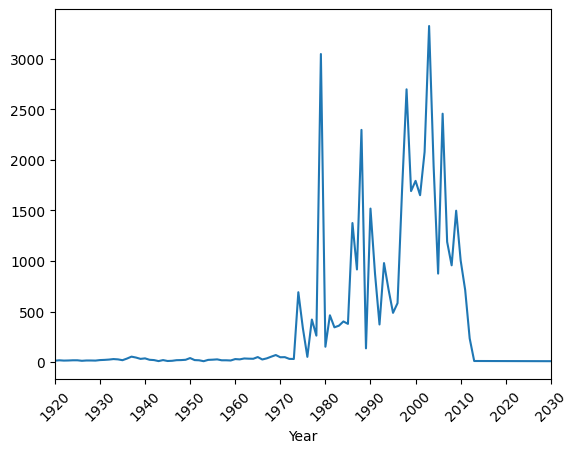

In [293]:
plt.xlim(1920, 2020)
plt.xticks(range(1920, 2040, 10))
meteorite_per_year.plot(xlabel='Year', rot=45)



There is a lot more we can read from a graphical representation of our data.

Let's now create a pie chart showing how common various meteorite classes are.

In [334]:
meteorite_per_class = data.groupby('recclass', observed=True)['recclass'].count()

In [335]:
meteorite_per_class

recclass
Acapulcoite               54
Acapulcoite/Lodranite      6
Acapulcoite/lodranite      3
Achondrite-prim            9
Achondrite-ung            57
                        ... 
Unknown                    7
Ureilite                 300
Ureilite-an                4
Ureilite-pmict            23
Winonaite                 25
Name: recclass, Length: 465, dtype: int64

There are quite a lot of different classes. To make the chart more legible we might want to group the lowest occuring meteors together.

In [336]:
meteorite_per_class.index = meteorite_per_class.index.where(meteorite_per_class > 500, 'Other')


In [337]:
meteorite_per_class

recclass
Other     54
Other      6
Other      3
Other      9
Other     57
        ... 
Other      7
Other    300
Other      4
Other     23
Other     25
Name: recclass, Length: 465, dtype: int64

In [338]:
meteorite_per_class_groupped = meteorite_per_class.groupby(level=0).sum()

<Axes: ylabel='recclass'>

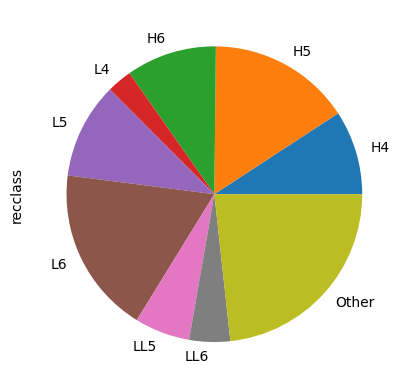

In [339]:
meteorite_per_class_groupped.plot(kind='pie')